In [151]:
import numpy
import pylab
from numpy import array, arange, dot, ones, random, eye, linalg
import seaborn as sns
%matplotlib inline

In [136]:
def add_noise(X, mean=0, stddev=0.2):
    e = random.normal(mean, stddev, len(X))
    X = X + e
    return X

In [137]:
def linear_model(X,a):
    return dot(X.T,a)
#     return dot(a,X)

We can illustrate Bayesian learning in a linear basis function model, as well as the sequential update of a posterior distribution, using a simple example involving straight-line fitting. Consider a single input variable x, a single target variable t and a linear model of the form y(x,**w**) = w<sub>0</sub> + w<sub>1</sub>x. Because this has just two adaptive parameters we can plot the prior and hte posterior distributions directly in parameter space. We generate synthetic data from the function f(x,**a**) = a<sub>0</sub> + a<sub>1</sub>x with parameter values a<sub>0</sub> = -0.3 and a<sub>1</sub> = 0.5 by first choosing values of x<sub>n</sub> from the uniform distribution U(x|-1,1), then evaluating f(x<sub>n</sub>,**a**), and finally adding Gaussian noise with standard deviation of 0.2 to obtain the target values *t*<sub>*n*</sub>.


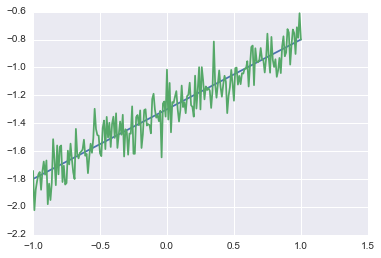

In [153]:
a = array([-0.3, 0.5])
X = arange(-1,1.01,0.01)
X_offset = array([ones(len(X)), X])
data = linear_model(X_offset,a)
target = add_noise(data)
pylab.figure(1)
sns.plt.plot(X,data)
sns.plt.plot(X,target)

We shall treat the noise precision parameter $\beta$ as a known constant. The prior is given by a Gaussian distribution of the form $p(w) = N(w|m_0,S_0)$. For the remainder of this chapter, we shall consider a particular form of Gaussian prior in order to simplify the treatment. Specifically, we consider a zero-mean isotropic Gaussian governed by a single precision parameter $\alpha$ so that $p(w|\alpha) = N(w|0,\alpha^{-1}I$)

Our goal is to recover the values of $a_0$ and $a_1$ from such data, and we will explore the dependence on the size of the data set. We assume here that the noise variance is known and hence we set the precision parameter to its true value $\beta = (1/0.2)^2$. Similarly we fix the parameter $\alpha$ to 2.0. We shall shortly discuss strategies for determining $\alpha$ and $\beta$ from the training data.

In [175]:
def compute_prior(alpha=2, num_samples=100000):
    I = eye(len(a))
    prior_cov = (alpha**-1)*I
    prior_mean = array([0,0])
    w_prior = random.multivariate_normal(prior_mean,prior_cov,num_samples)
    plot2DGaussian(w_prior)
    return w_prior

In [176]:
def plot2DGaussian(X):
    sns.jointplot(X[:,0],X[:,1],kind='hex')
    sns.plt.show()

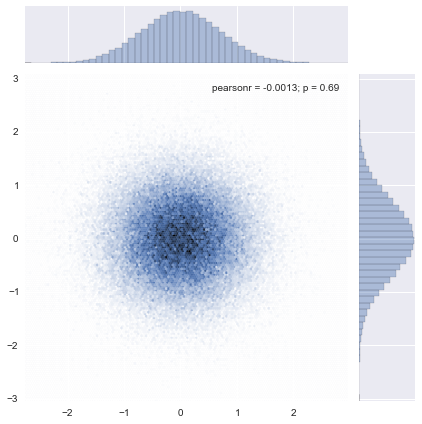

In [179]:
num_samples = 100000
w_prior = compute_prior()

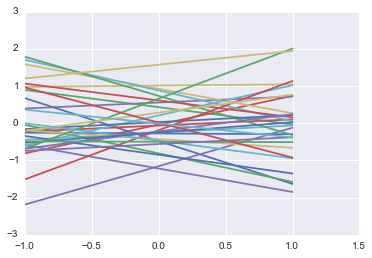

In [180]:
w_samples = w_prior[:30,:]
for sample in w_samples:
    y = linear_model(X_offset,sample)
    sns.plt.plot(X,y)

![stupid](https://36.media.tumblr.com/tumblr_md8rw5rj2O1r8f82jo1_500.jpg)

Now we see the situation after observing a single data point. The location $(x,t)$ of the data point is shown by a blue circle. There is also a plot of the likelihood function $p(t|x,w)$ for this data point as a function of w. Note that the likelihood function provides a soft constraint that the line must pass close to the data point, where close is determined by the noise precision $\beta$. For comparison, the true parameter values $a_0 = -0.3$ and $a_1 = 0.5$ used to generate the data set are shown by a white cross in the plots in the likelihood plot. When we multiply this likelihood function b ythe prior and normalize we obtain the posterior distribution shown.

In [181]:
def compute_posterior(X,Y,variance=0.3, num_samples=100000):
    #X is an input vector D x n where n is the number of observations and D is the dimension
    #Y is a vector of scalar outputs or target (dependent variable) 
#     X = numpy.matrix(X)
#     Y = numpy.matrix(Y)
    alpha = 2.0
    beta = 25
    A = beta*dot(X,X.T) + alpha*eye(len(X))
    A_inv = A
    A_inv = linalg.inv(A)
    mean = beta*(dot(dot(A_inv,X),Y))
    w_posterior = random.multivariate_normal(mean,A_inv,num_samples)
    plot2DGaussian(w_posterior)
    return w_posterior

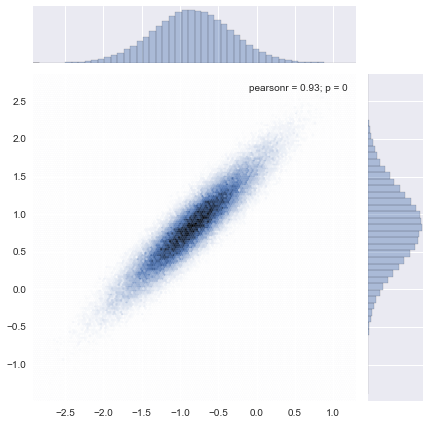

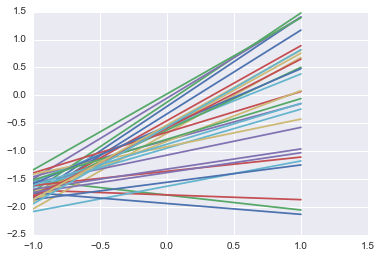

In [182]:
datapoint_x = X_offset[:,:1]
datapoint_y = target[:1]
w_posterior = compute_posterior(datapoint_x,datapoint_y)
w_samples = w_posterior[:30,:]
for sample in w_samples:
    y = linear_model(X_offset,sample)
    sns.plt.plot(X,y)

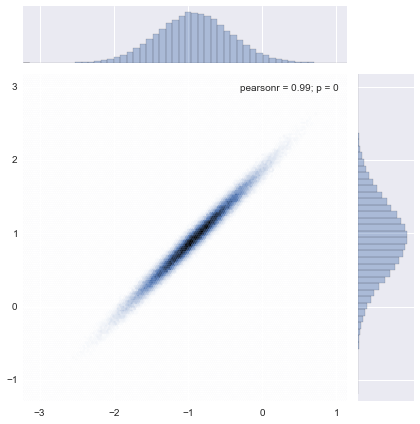

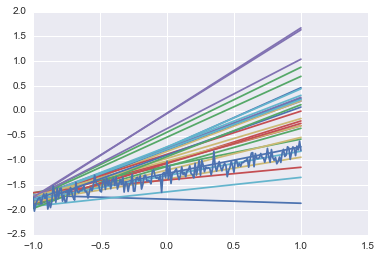

In [186]:
datapoint_x = X_offset[:,:6]
datapoint_y = target[:6]
w_posterior = compute_posterior(datapoint_x,datapoint_y)
w_samples = w_posterior[:30,:]
for sample in w_samples:
    y = linear_model(X_offset,sample)
    sns.plt.plot(X,y)
sns.plt.figure(1)
sns.plt.plot(X,target)

In [184]:
def compute_likelihood(X,w,variance):
    mean = dot(X.T,w)
    covariance = variance*eye(len())

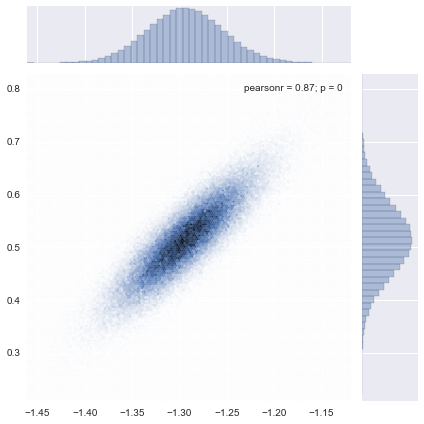

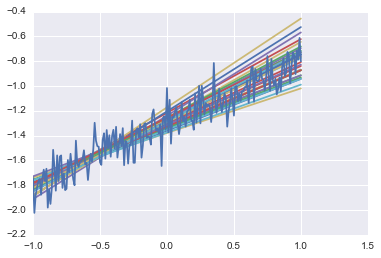

In [189]:
datapoint_x = X_offset[:,:100]
datapoint_y = target[:100]
w_posterior = compute_posterior(datapoint_x,datapoint_y)
w_samples = w_posterior[:30,:]
for sample in w_samples:
    y = linear_model(X_offset,sample)
    sns.plt.plot(X,y)
sns.plt.figure(1)
sns.plt.plot(X,target)